<a href="https://colab.research.google.com/github/entangelk/study_data_analytics/blob/main/docs/quests/EDAs/EDA_ShoppingMallDeliveryWithDate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글 폰트 설치 및 시각화

In [ ]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 런타임메뉴에서 리스타트 세션 해줘야함

- 한글 폰트 설치가 끝났으면 리스타트 잊지말라구!

In [1]:
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
# 유니코드 마이너스 사용 설정
plt.rcParams['axes.unicode_minus'] = False

In [5]:
import numpy as np

## 시작

In [6]:
get_data = pd.read_csv('ShoppingMallDeliveryWithDate_redown.csv')
get_data

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231
...,...,...,...,...,...,...,...,...,...
46744,카드,D-20171229-0000036-00,2017-12-29 오후 4:32,2018-01-02 오전 5:31,52800,445.0,1,모바일웹,20171229
46745,카드,D-20171229-0000043-00,2018-01-03 오전 9:45,2018-01-07 오전 5:38,112200,172.0,2,모바일웹,20171229
46746,카드,D-20171230-0000022-01,2018-01-02 오후 7:06,2018-01-11 오전 2:46,36000,140.0,1,네이버 페이,20171230
46747,카드,D-20171231-0000017-01,2018-01-03 오후 2:00,2018-01-06 오후 6:06,73460,184.0,1,네이버 페이,20171231


### 연속형 -> 범주형 만들기 (상품구매금액)

In [7]:
get_data.query('상품구매금액 != 0')['상품구매금액'].sort_values()

44821         10
1843         700
43211        890
39738       1300
27081       1320
          ...   
33126    1691250
29160    1825800
31697    1916750
20642    1920000
24512    4963400
Name: 상품구매금액, Length: 37601, dtype: int64

In [8]:
bins = [-1,0,9999,49999,99999,499999,9999999999]
labels = ['0','1-10000','10001-50000','50001-100000','100001-500000','500000+']
get_data['상품구매금액_category'] = pd.cut(x=get_data['상품구매금액'], bins=bins, labels=labels)

In [9]:
get_data['상품구매금액_category']

0         50001-100000
1        100001-500000
2          10001-50000
3         50001-100000
4         50001-100000
             ...      
46744     50001-100000
46745    100001-500000
46746      10001-50000
46747     50001-100000
46748     50001-100000
Name: 상품구매금액_category, Length: 46749, dtype: category
Categories (6, object): ['0' < '1-10000' < '10001-50000' < '50001-100000' < '100001-500000' <
                         '500000+']

In [10]:
get_data['상품구매금액_category'].value_counts().sort_index()

0                 9148
1-10000            289
10001-50000       5060
50001-100000     22945
100001-500000     9263
500000+             44
Name: 상품구매금액_category, dtype: int64

### 제안 9: 고객 피드백 및 배송 만족도 조사 (폐기)
- 문제 정의: 배송 서비스에 대한 고객 피드백 및 만족도를 조사하여 서비스 개선점을 도출합니다.
- 배경: 고객 피드백과 만족도 조사를 통해 배송 서비스의 질을 평가하고, 고객의 요구에 부합하는 서비스 개선을 진행할 수 있습니다.


#### 상품구매금액의 이상치(0원)에 대한 분석
- 이것이 가격이 적히지 않은 이상치인가?
- 이것은 환불, 교환 등으로 인해 고객이 비용을 지불하지 아니하여도 괜찮은 배송이었는가?

#### 상품구매금액과 수량의 주요 고객층, 하위고객층, 상위고객층을 나누어 만족도 조사
- 를위한 분석을 하려하였으나 탈락

In [11]:
get_data['상품구매금액'].mean()

69368.14445228774

In [12]:
get_data.query('상품구매금액 != 0')[['상품구매금액','수량','상품번호']]

,상품구매금액,수량,상품번호
0,71450,1,1077.0
1,141240,2,42.0
2,13910,1,1271.0
3,81600,1,1085.0
4,94710,1,1106.0
...,...,...,...
46744,52800,1,445.0
46745,112200,2,172.0
46746,36000,1,140.0
46747,73460,1,184.0


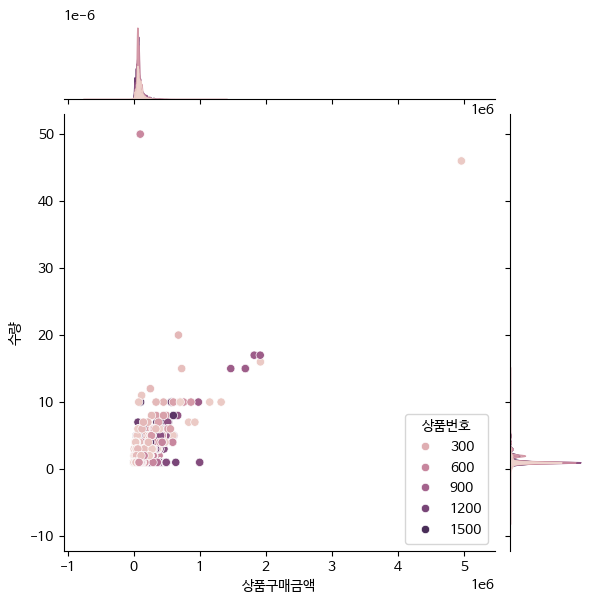

In [13]:
sns.jointplot(data=get_data.query('상품구매금액 != 0'), x='상품구매금액', y='수량', hue='상품번호')

### 이상치 처리
- 상품구매금액이 '0'인 이유를 확인
- 상품 번호를 확인하여 동일한 상품번호의 다른 데이터와 비교

In [14]:
zero_index = get_data.query('상품구매금액 == 0')['상품번호'].unique().tolist()
zero_index

[582.0,
 627.0,
 583.0,
 352.0,
 360.0,
 355.0,
 534.0,
 359.0,
 584.0,
 354.0,
 579.0,
 580.0,
 357.0,
 358.0,
 589.0,
 581.0,
 356.0,
 533.0,
 350.0,
 353.0,
 588.0,
 351.0,
 1136.0,
 587.0,
 1159.0,
 1165.0,
 1164.0,
 1162.0,
 1163.0,
 1209.0,
 1238.0,
 1237.0,
 1243.0]

In [15]:
zero_price = get_data.query(f'상품번호 == {zero_index}')
zero_price

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category
17551,무통장입금,D-20171227-0000094-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,582.0,1,PC쇼핑몰,20171227,0
17558,카드,D-20180102-0000019-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,627.0,1,모바일웹,20180102,0
17562,무통장입금,D-20180102-0000022-00,2018-01-05 오전 10:02,2018-01-09 오전 5:35,0,583.0,1,PC쇼핑몰,20180102,0
17565,카드,D-20180102-0000045-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,352.0,1,모바일웹,20180102,0
17569,카드,D-20180102-0000073-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,360.0,1,PC쇼핑몰,20180102,0
...,...,...,...,...,...,...,...,...,...,...
46699,"적립금,카드",D-20171226-0000098-00,2017-12-26 오후 5:39,2017-12-30 오전 5:36,0,581.0,1,PC쇼핑몰,20171226,0
46706,무통장입금,D-20171226-0000181-00,2017-12-27 오후 4:46,2017-12-31 오전 5:36,0,588.0,1,PC쇼핑몰,20171226,0
46717,무통장입금,D-20171227-0000055-00,2017-12-27 오후 4:46,2017-12-31 오전 5:36,0,534.0,1,모바일웹,20171227,0
46724,무통장입금,D-20171228-0000041-00,2017-12-28 오후 6:20,2018-01-01 오전 5:37,0,580.0,1,PC쇼핑몰,20171228,0


In [16]:
pd.pivot_table(data=zero_price[['상품구매금액','상품번호']], index=['상품번호'], values=['상품구매금액'], aggfunc='sum')

,상품구매금액
상품번호,
350.0,0
351.0,0
352.0,0
353.0,0
354.0,0
355.0,23100
356.0,0
357.0,0
358.0,3700


- 355, 358 상품번호의 가격이 0이 아니므로 이 아이템에 대한 0값은 이상치일 확률이 매우 높음
- 355, 358의 이상치는 대표값으로 대체
- 다른 모든 상품번호는 모든 데이터의 합이 0이므로 원래 가격이 0이거나 따로 이벤트용 또는 교환 등의 상품을 다른 상품번호로 취급하였을 가능성이 높음

In [17]:
get_data.query('상품번호 == 355 & 상품구매금액 != 0')
# 355번 상품금액 = 23100원

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category
24539,무통장입금,D-20180621-0000128-03,2018-06-21 오후 8:44,2018-06-25 오전 5:32,23100,355.0,1,PC쇼핑몰,20180621,10001-50000


In [18]:
# get_data.query('상품번호 == 355')['상품구매금액'] = get_data.query('상품번호 == 355')['상품구매금액'].replace(0,23100)
get_data.loc[get_data['상품번호'] == 355, '상품구매금액'] = get_data.loc[get_data['상품번호'] == 355, '상품구매금액'].replace(0,23100)

In [19]:
get_data.query('상품번호 == 355 & 상품구매금액 == 0')

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category


- 상품번호 355 이상치 수정 완료

In [20]:
get_data.query('상품번호 == 358 & 상품구매금액 != 0')
# 358번 상품금액 = 3700원

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category
18284,"적립금,무통장입금",D-20180131-0000144-00,2018-02-01 오후 5:08,2018-02-05 오전 5:40,3700,358.0,1,PC쇼핑몰,20180131,1-10000


In [21]:
get_data.loc[get_data['상품번호'] == 358, '상품구매금액'] = get_data.loc[get_data['상품번호'] == 358, '상품구매금액'].replace(0,23100)

In [22]:
get_data.query('상품번호 == 358 & 상품구매금액 == 0')

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category


- 상품번호 358 이상치 수정 완료

In [23]:
get_data.query('상품번호 == 581 & 상품구매금액 != 0')
# 355번 상품금액 평균값 = 100000/50 = 2000원

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category
38590,무통장입금,D-20181112-0000709-00,2018-11-16 오전 9:10,2018-11-20 오전 5:32,100000,581.0,50,PC쇼핑몰,20181112,100001-500000


In [24]:
get_data.loc[get_data['상품번호'] == 581, '상품구매금액'] = get_data.loc[get_data['상품번호'] == 581, '상품구매금액'].replace(0,2000)
get_data.query('상품번호 == 581 & 상품구매금액 == 0')

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category


- 상품번호 581 이상치 수정 완료

- 이상치 별도로 추출하여 따로 저장 진행
- 정제된 값으로 분석 준비

In [25]:
zero_index = get_data.query('상품구매금액 == 0')['상품번호'].unique().tolist()
zero_price = get_data.query(f'상품번호 == {zero_index}').copy()
get_data['상품구매금액'] = get_data['상품구매금액'].replace(0,np.nan)

In [26]:
get_data = get_data.dropna()

- 2분화 완료
- get_data = 실제 판매 상품
- zero_price = 기타 0원 상품

In [27]:
zero_price

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category
17551,무통장입금,D-20171227-0000094-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,582.0,1,PC쇼핑몰,20171227,0
17558,카드,D-20180102-0000019-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,627.0,1,모바일웹,20180102,0
17562,무통장입금,D-20180102-0000022-00,2018-01-05 오전 10:02,2018-01-09 오전 5:35,0,583.0,1,PC쇼핑몰,20180102,0
17565,카드,D-20180102-0000045-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,352.0,1,모바일웹,20180102,0
17569,카드,D-20180102-0000073-00,2018-01-02 오후 5:59,2018-01-06 오전 5:33,0,360.0,1,PC쇼핑몰,20180102,0
...,...,...,...,...,...,...,...,...,...,...
46665,무통장입금,D-20171221-0000111-00,2017-12-22 오후 4:46,2017-12-26 오전 5:33,0,589.0,1,모바일웹,20171221,0
46706,무통장입금,D-20171226-0000181-00,2017-12-27 오후 4:46,2017-12-31 오전 5:36,0,588.0,1,PC쇼핑몰,20171226,0
46717,무통장입금,D-20171227-0000055-00,2017-12-27 오후 4:46,2017-12-31 오전 5:36,0,534.0,1,모바일웹,20171227,0
46724,무통장입금,D-20171228-0000041-00,2017-12-28 오후 6:20,2018-01-01 오전 5:37,0,580.0,1,PC쇼핑몰,20171228,0


### 제안 4: 특정 시즌별 배송 패턴 분석
- 문제 정의: 연중 특정 시즌(예: 명절, 할인 시즌 등)에 발생하는 배송 패턴과 그 영향을 분석합니다.
- 배경: 시즌별 배송 수요의 변화를 이해하고 이에 대비하는 전략을 수립하는 것은 물류 계획에 중요합니다.


In [28]:
get_data['주문일_month'] = get_data['주문일'].astype(str).str.slice(4, 6).astype(int)
get_data['주문일_month']

<ipython-input-28-c9dc92760501>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  get_data['주문일_month'] = get_data['주문일'].astype(str).str.slice(4, 6).astype(int)


0        12
1        12
2        12
3        12
4        12
         ..
46744    12
46745    12
46746    12
46747    12
46748    12
Name: 주문일_month, Length: 38805, dtype: int64

In [29]:
zero_price['주문일_month'] = zero_price['주문일'].astype(str).str.slice(4, 6).astype(int)
zero_price['주문일_month']

17551    12
17558     1
17562     1
17565     1
17569     1
         ..
46665    12
46706    12
46717    12
46724    12
46743    12
Name: 주문일_month, Length: 7856, dtype: int64

In [30]:
get_data['주문일_month'].value_counts()

5     5164
4     4948
3     4335
1     4051
2     3439
12    3157
11    3060
10    2761
8     2354
7     2098
9     1829
6     1609
Name: 주문일_month, dtype: int64

In [31]:
zero_price['주문일_month'].value_counts()

12    1215
11    1203
10    1110
8      880
7      760
9      687
5      616
6      549
4      396
3      179
1      154
2      107
Name: 주문일_month, dtype: int64

In [32]:
get_data

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,상품구매금액_category,주문일_month
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450.0,1077.0,1,PC쇼핑몰,20181227,50001-100000,12
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240.0,42.0,2,모바일웹,20181229,100001-500000,12
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910.0,1271.0,1,모바일웹,20181230,10001-50000,12
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600.0,1085.0,1,모바일웹,20181231,50001-100000,12
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710.0,1106.0,1,모바일웹,20181231,50001-100000,12
...,...,...,...,...,...,...,...,...,...,...,...
46744,카드,D-20171229-0000036-00,2017-12-29 오후 4:32,2018-01-02 오전 5:31,52800.0,445.0,1,모바일웹,20171229,50001-100000,12
46745,카드,D-20171229-0000043-00,2018-01-03 오전 9:45,2018-01-07 오전 5:38,112200.0,172.0,2,모바일웹,20171229,100001-500000,12
46746,카드,D-20171230-0000022-01,2018-01-02 오후 7:06,2018-01-11 오전 2:46,36000.0,140.0,1,네이버 페이,20171230,10001-50000,12
46747,카드,D-20171231-0000017-01,2018-01-03 오후 2:00,2018-01-06 오후 6:06,73460.0,184.0,1,네이버 페이,20171231,50001-100000,12


In [33]:
get_data[['주문일']].astype(str).query('주문일.str.len() != 8')

,주문일
